## <a style="color:#6699ff"> Theoretical guidelines for high-dimensional data analysis: </a>

### <a style="color:#6699ff"> False Discoveries occur Early on the Lasso Path </a>

##### <a style="color:#6699ff"> Auteurs: BALL Alhousseynou et Thi Hai Yen VU </a>

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

## Some graphs

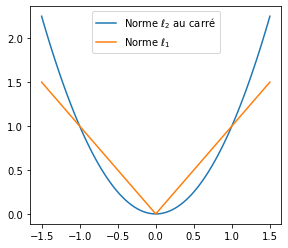

In [0]:
plt.figure(figsize=(4.5,4))
x = np.linspace(-1.5,1.5,101)
plt.plot(x, x**2, label='Norme $\ell_2$ au carré')
plt.plot(x, np.abs(x), label='Norme $\ell_1$')
plt.legend()
plt.show()

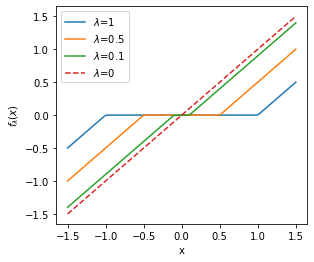

In [0]:
plt.figure(figsize=(4.5,4))
x = np.linspace(-1.5,1.5,101)
plt.plot(x, np.sign(x)*(np.maximum(np.abs(x)-1, 0)), label='$\lambda$=1')
plt.plot(x, np.sign(x)*(np.maximum(np.abs(x)-0.5, 0)), label='$\lambda$=0.5')
plt.plot(x, np.sign(x)*(np.maximum(np.abs(x)-0.1, 0)), label='$\lambda$=0.1')
plt.plot(x, np.sign(x)*(np.maximum(np.abs(x)-0, 0)),'--', label='$\lambda$=0')
plt.legend()
plt.xlabel('x')
plt.ylabel('$f_\lambda(x)$')
plt.show()

In [0]:
def prox_L1(x, lmbd):
    """Proximal operator for the L1 at x"""
    z = np.sign(x) * np.maximum(np.absolute(x) - lmbd,0)
    return z

In [0]:
from numpy.random import randn

C:\Users\Haiyen Vu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\Users\Haiyen Vu\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
C:\Users\Haiyen Vu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the perform

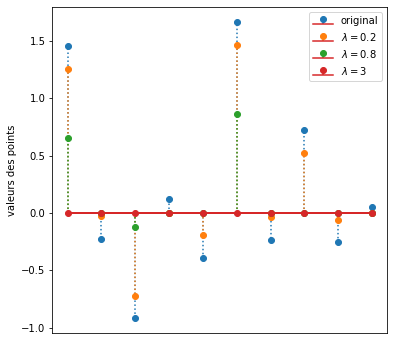

In [0]:
n = 10
rang = np.arange(n)
x = randn(n)
l_l1 = 1.

plt.figure(figsize=(6, 6))

markerline, stemlines, baseline = plt.stem(np.arange(n),x, markerfmt='o', label='original')
plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
plt.setp(stemlines, 'linestyle', 'dotted')


markerline, stemlines, baseline = plt.stem(np.arange(n), prox_L1(x, lmbd=0.2), markerfmt='o', label='$\lambda=0.2$')
plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
plt.setp(stemlines, 'linestyle', 'dotted')

markerline, stemlines, baseline = plt.stem(np.arange(n), prox_L1(x, lmbd=0.8), markerfmt='o', label='$\lambda=0.8$')
plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
plt.setp(stemlines, 'linestyle', 'dotted')

markerline, stemlines, baseline = plt.stem(np.arange(n), prox_L1(x, lmbd=3), markerfmt='o', label='$\lambda=3$')
plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
plt.setp(stemlines, 'linestyle', 'dotted')

plt.xticks([])
plt.ylabel('valeurs des points')
plt.legend()
plt.show()

## The Lasso Path

In [0]:
from sklearn.linear_model import Lasso

In [0]:
y = [1.5,2]
delta = 0.25
x1 = np.arange(-5, 10, delta)
x2 = np.arange(-5, 10, delta)
X1, X2 = np.meshgrid(x1, x2)
def quad(x1, x2):
    return ((y[0]-(0.1*x1+0.3*x2))**2 + (y[1]-(0.3*x1+0.2*x2))**2)/2
Z = quad(X1, X2)

C:\Users\Haiyen Vu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
C:\Users\Haiyen Vu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


Text(0.5, 1.0, 'Chemin de Lasso')

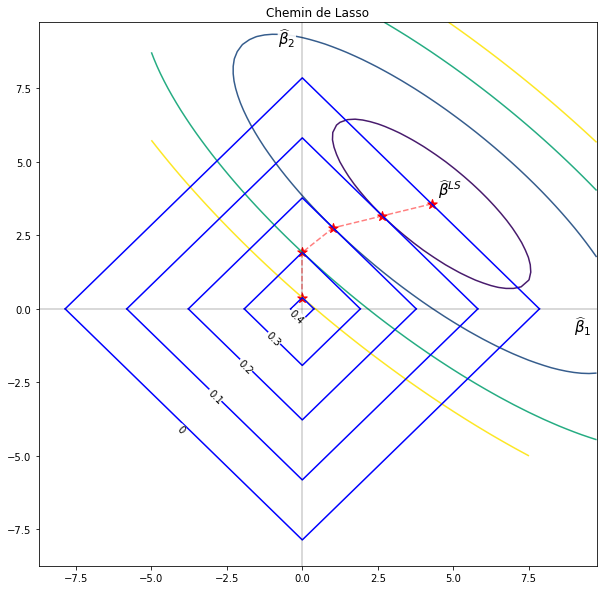

In [0]:
fig, ax = plt.subplots(figsize=(10, 10))
def plot_l1_ball(r):
    ax.plot([-r, 0, r], [0, r, 0], c= 'b')
    ax.plot([-r, 0, r], [0, -r, 0], c= 'b')
    
lasso_pts = []
for lbda in [0, 0.1, 0.2, 0.3, 0.4]:
    clf = Lasso(alpha=lbda, fit_intercept=False)
    clf.fit([[0.1,0.3], [0.3, 0.2]], [1.5, 2])
    a = clf.coef_[0]
    b = clf.coef_[1]
    r = np.abs(a) + np.abs(b)
    plot_l1_ball(r)
    ax.scatter(a,b, marker='*', c='r', s= 100)
    rand = r/2 #np.random.rand()*r
    ax.text(-rand-0.3, -r+rand-0.3, str(lbda), rotation=315, fontsize=10,
        bbox={'facecolor': 'white','edgecolor': 'white', 'alpha': 1, 'boxstyle': 'round,pad=0'})
    lasso_pts.append(clf.coef_)
    
for i in range(len(lasso_pts)-1):
    a = lasso_pts[i]
    b = lasso_pts[i+1]
    ax.plot([a[0], b[0]],[a[1], b[1]], '--', c='r',alpha=0.5)
    
ax.text(lasso_pts[0][0]+0.2, lasso_pts[0][1]+0.3, r'$\widehat{\beta}^{LS}$', fontsize=15,
        bbox={'facecolor': 'white','edgecolor': 'white', 'alpha': 0.9, 'boxstyle': 'round,pad=0'})

ax.text(9, -0.8, r'$\widehat{\beta}_1$', fontsize=15,
        bbox={'facecolor': 'white','edgecolor': 'white', 'alpha': 0.9, 'boxstyle': 'round,pad=0'})

ax.text(-0.8, 9, r'$\widehat{\beta}_2$', fontsize=15,
        bbox={'facecolor': 'white','edgecolor': 'white', 'alpha': 0.9, 'boxstyle': 'round,pad=0'})

lasso_pts = np.array(lasso_pts)
r_s = quad(lasso_pts[:,0],lasso_pts[:,1])

CS = ax.contour(X1, X2, Z, r_s) #[0.005, 0.03, 0.1, 0.3, 0.6, 1.2, 2, 3])
#ax.clabel(CS, inline=2, fontsize=10)
ax.axhline(y=0, color='k',alpha = 0.2)
ax.axvline(x=0, color='k',alpha = 0.2)
ax.set_title('Chemin de Lasso')

## The Boundary Curve

In [0]:
from scipy.optimize import fminbound
from scipy.stats import norm

In [0]:
def fdrlasso(tpp, delta, epsi):
    """
    Adapted from https://github.com/wjsu/fdrlasso/blob/master/fdrlasso.m
    -------------------
    This function calculates the Lasso trade-off curve given tpp (true
    positive proportion), delta = n/p (shape of the design matrix, or
    subsampling rate), and epsi = k/p (sparsity ratio).
    All tpp, delta, and epsi are between 0 and 1; if the
    pair (delta, epsi) is above the Donoho-Tanner phase transition, tpp
    should be no larger than u^\star = powermax(delta, epsi)
    """
    if tpp > powermax(delta, epsi):
        return None

    if tpp == 0:
        return 0

    # make stepsize smaller for higher accuracy
    stepsize = 0.1
    tmax = max(10, np.sqrt(delta/epsi/tpp) + 1)
    tmin = tmax - stepsize

    while tmin > 0:
        if lsandwich(tmin, tpp, delta, epsi) < rsandwich(tmin, tpp):
            break
            
        tmax = tmin
        tmin = tmax - stepsize

    if tmin <= 0:
        stepsize = stepsize/100
        tmax = max(10, sqrt(delta/epsi/tpp) + 1)
        tmin = tmax - stepsize
        while tmin > 0:
            if lsandwich(tmin, tpp, delta, epsi) < rsandwich(tmin, tpp):
                break

            tmax = tmin
            tmin = tmax - stepsize
  
    diff = tmax - tmin
    while diff > 1e-6:
        tmid = 0.5*tmax + 0.5*tmin
        if lsandwich(tmid, tpp, delta, epsi) > rsandwich(tmid, tpp):
            tmax = tmid
        else: 
            tmin = tmid
        
        diff = tmax - tmin

    t = (tmax + tmin)/2

    q = 2*(1 - epsi)*norm.cdf(-t)/(2*(1 - epsi)*norm.cdf(-t) + epsi*tpp)

    return q

def lsandwich(t, tpp, delta, epsi):
    Lnume = (1-epsi)*(2*(1+t**2)*norm.cdf(-t) - 2*t*norm.pdf(t)) + epsi*(1+t**2) - delta
    Ldeno = epsi*((1+t**2)*(1-2*norm.cdf(-t)) + 2*t*norm.pdf(t))
    L = Lnume/Ldeno
    return L

def rsandwich(t, tpp):
    R = (1 - tpp)/(1 - 2*norm.cdf(-t))
    return R

# highest power for delta < 1 and epsilon > epsilon_phase
def powermax(delta, epsilon):
    if delta >= 1:
        return 1

    epsilon_star = epsilonDT(delta)
    
    if epsilon <= epsilon_star:
          return 1
    
    power = (epsilon - epsilon_star)*(delta - epsilon_star)/epsilon/(1 - epsilon_star) + epsilon_star/epsilon
    return power

def epsilonDT(delta):
    minus_f = lambda x: -(1+2/delta*x*norm.pdf(x) - 2/delta*(1+x**2)*norm.cdf(-x))/(1+x**2-2*(1+x**2)*norm.cdf(-x)+2*x*norm.pdf(x))*delta
    alpha_phase = fminbound(minus_f, 0, 8)
    epsi = -minus_f(alpha_phase)
    
    return epsi

### Lasso Trade-off Diagram

In [0]:
tpp_lin = np.linspace(0,1,100)

delta1, epsi1 = 0.5, 0.15
bound_curve_1 = np.array([fdrlasso(elt, delta=delta1, epsi=epsi1) for elt in tpp_lin])
bound_curve_1[bound_curve_1 == None] = 1.
bound_curve_1 = bound_curve_1.astype('float')

delta2, epsi2 = 0.3, 0.15
bound_curve_2 = np.array([fdrlasso(elt, delta=delta2, epsi=epsi2) for elt in tpp_lin])
bound_curve_2[bound_curve_2 == None] = 1.
bound_curve_2 = bound_curve_2.astype('float')

Text(0, 0.5, 'FDP')

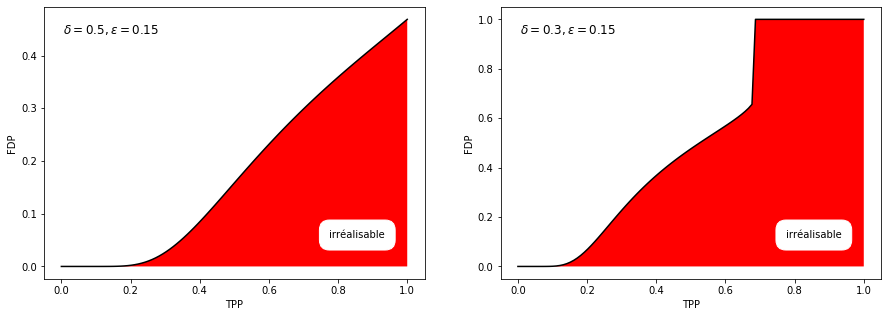

In [0]:
f = plt.figure(figsize=(15,5))

ax1 = f.add_subplot(121)
ax1.plot(tpp_lin, bound_curve_1, c='k')
ax1.fill_between(tpp_lin, 0, bound_curve_1, facecolor='r')
ax1.text(0.75, 0.15,'irréalisable', transform=ax1.transAxes, fontsize=10,
        bbox={'facecolor': 'white','edgecolor': 'white', 'alpha': 1, 'boxstyle': 'round,pad=1'})
ax1.text(0.05, 0.9,r'$\delta=$'+str(delta1)+r'$, \epsilon=$'+str(epsi1), transform=ax1.transAxes, fontsize=12)
ax1.set_xlabel('TPP')
ax1.set_ylabel('FDP')

ax2 = f.add_subplot(122)
ax2.plot(tpp_lin, bound_curve_2, c='k')
ax2.fill_between(tpp_lin, 0, bound_curve_2, facecolor='r')
ax2.text(0.75, 0.15,'irréalisable', transform=ax2.transAxes, fontsize=10,
        bbox={'facecolor': 'white','edgecolor': 'white', 'alpha': 1, 'boxstyle': 'round,pad=1'})
ax2.text(0.05, 0.9,r'$\delta=$'+str(delta2)+r'$, \epsilon=$'+str(epsi2), transform=ax2.transAxes, fontsize=12)
ax2.set_xlabel('TPP')
ax2.set_ylabel('FDP')

### Varying $\varepsilon$ and $\delta$

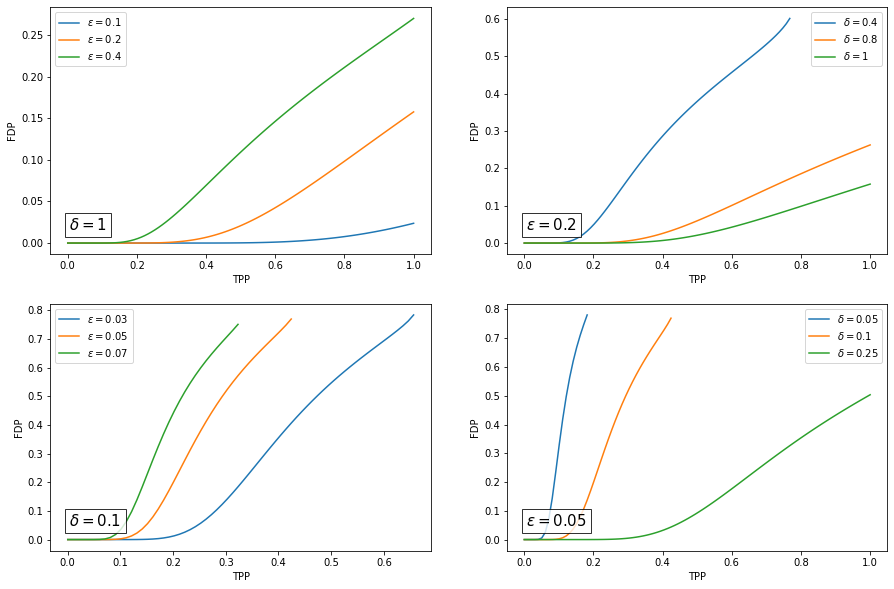

In [0]:
f = plt.figure(figsize=(15,10))
tpp_lin = np.linspace(0,1,100)

ax1 = f.add_subplot(221)
delta=1
for epsi in [0.1, 0.2, 0.4]:
    bound_curve = np.array([fdrlasso(elt, delta=delta, epsi=epsi) for elt in tpp_lin])
    ax1.plot(tpp_lin, bound_curve, '-', label=r'$\varepsilon=$'+str(epsi))
ax1.text(0.05, 0.1,r'$\delta=$'+str(delta), transform=ax1.transAxes, fontsize=15,
        bbox={'facecolor': 'white', 'alpha': 0.8})
ax1.set_xlabel('TPP')
ax1.set_ylabel('FDP')
ax1.legend()
    
ax3 = f.add_subplot(223)
delta=0.1
for epsi in [0.03, 0.05, 0.07]:
    bound_curve = np.array([fdrlasso(elt, delta=delta, epsi=epsi) for elt in tpp_lin])
    ax3.plot(tpp_lin, bound_curve, '-', label=r'$\varepsilon=$'+str(epsi))
ax3.text(0.05, 0.1,r'$\delta=$'+str(delta), transform=ax3.transAxes, fontsize=15,
    bbox={'facecolor': 'white', 'alpha': 0.8})
ax3.set_xlabel('TPP')
ax3.set_ylabel('FDP')
ax3.legend()

ax2 = f.add_subplot(222)
epsi=0.2
for delta in [0.4, 0.8, 1]:
    bound_curve = np.array([fdrlasso(elt, delta=delta, epsi=epsi) for elt in tpp_lin])
    ax2.plot(tpp_lin, bound_curve, '-', label=r'$\delta=$'+str(delta))
ax2.text(0.05, 0.1,r'$\varepsilon=$'+str(epsi), transform=ax2.transAxes, fontsize=15,
    bbox={'facecolor': 'white', 'alpha': 0.8})
ax2.set_xlabel('TPP')
ax2.set_ylabel('FDP')
ax2.legend()

ax4 = f.add_subplot(224)
epsi=0.05
for delta in [0.05, 0.1, 0.25]:
    bound_curve = np.array([fdrlasso(elt, delta=delta, epsi=epsi) for elt in tpp_lin])
    ax4.plot(tpp_lin, bound_curve, '-', label=r'$\delta=$'+str(delta))
ax4.text(0.05, 0.1,r'$\varepsilon=$'+str(epsi), transform=ax4.transAxes, fontsize=15,
    bbox={'facecolor': 'white', 'alpha': 0.8})
ax4.set_xlabel('TPP')
ax4.set_ylabel('FDP')
ax4.legend()

## TPP and FDP

In [0]:
from sklearn.linear_model import lasso_path, enet_path

In [0]:
def tpp(pred, true):
    return np.sum((true != 0) * (pred != 0))/max(np.sum(true != 0), 1)

def fdp(pred, true):
    return np.sum((true == 0) * (pred != 0))/max(np.sum(pred != 0), 1)

def tpp_fdp_simulation(n, p, eps=0.2,  noise=1, n_alphas=100, M=1, eps_prime=None, M_low=None, eps_algo=1e-3, algo='lasso'):
    k = int(eps*p)
    
    if eps_prime is None:
        true_coefs = np.concatenate([M*np.ones(k), np.zeros(p-k)])
    else:
        k1 = int(eps*eps_prime*p)
        k2 = int(eps*(1-eps_prime)*p)
        if M_low is None:
            M_low = 1/M
        true_coefs = np.concatenate([M*np.ones(k1), M_low*np.ones(k2), np.zeros(p-k1-k2)])
    
    tpps = []
    fdps = []
    
    X = np.random.normal(0, 1, (n, p))
    y = np.dot(X, true_coefs) + noise*np.random.normal(0, 1, n)
    
    if algo == 'lasso':
        alphas, coef_path,_ = lasso_path(X, y, eps=eps_algo, n_alphas=n_alphas)
    
    if algo == 'enet':
        alphas, coef_path,_ = enet_path(X, y, eps=eps_algo, n_alphas=n_alphas)

    for k in range(n_alphas):
        tpps.append(tpp(coef_path[:,k], true_coefs))
        fdps.append(fdp(coef_path[:,k], true_coefs))
        
    return tpps, fdps, alphas

### Lasso vs Enet

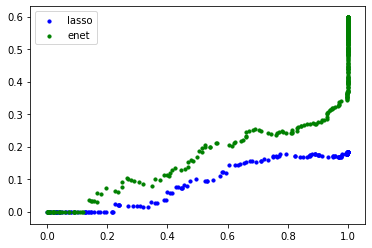

In [0]:
tpps_lasso, fdps_lasso, alphas_lasso = tpp_fdp_simulation(1010, 1000, noise=0, n_alphas=500, algo='lasso') 
tpps_enet, fdps_enet, alphas_enet = tpp_fdp_simulation(1010, 1000, noise=0, n_alphas=500, algo='enet') 

plt.scatter(tpps_lasso, fdps_lasso, s=10, marker='o', c= 'b')
plt.scatter(tpps_enet, fdps_enet, s=10, marker='o', c= 'g')
plt.legend(['lasso', 'enet'])
plt.show()

In [0]:
def plot_FDP_TPP(FDP, TPP, alphas, color, legende): 
    fig = plt.figure(figsize=(20, 5)) 
    ax0=plt.subplot(221)
    ax0.scatter(alphas, FDP, label='FDP', c=color ,s=7)
    ax0.set_title('False discovery proportion')
    ax0.set_ylabel('FDP')
    ax0.set_xlabel('alpha')
    plt.legend([legende])

    ax1=plt.subplot(222)
    ax1.scatter(alphas, TPP, label='TPP', c=color, s=7)
    ax1.set_ylabel('TPP')
    ax1.set_xlabel('alpha')
    plt.legend([legende])
    ax1.set_title('True positive proportion')
    plt.show()

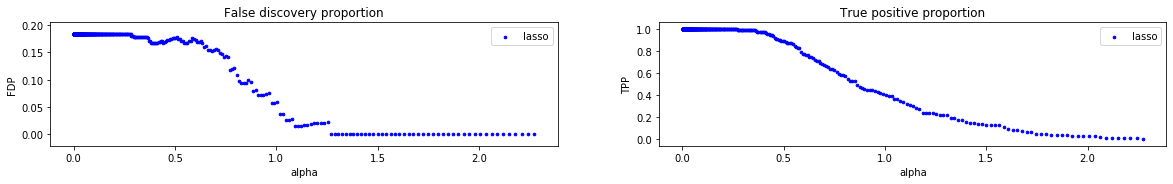

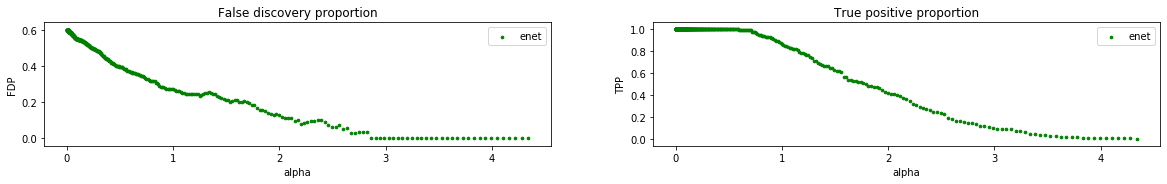

In [0]:
plot_FDP_TPP(fdps_lasso, tpps_lasso, alphas_lasso, 'b', 'lasso')    
plot_FDP_TPP(fdps_enet, tpps_enet, alphas_enet, 'g', 'enet')

In [0]:
def plot_first_last(n, p, k, color, algo):
    beta = np.append(np.ones(k), np.zeros(p - k))
    fdp_list = np.zeros(100)
    tpp_list = np.zeros(100)
    for i in range(100):
        X = np.random.normal(0, 1, (n, p))
        y = np.dot(X, beta) + np.random.normal(0, 1, n)
        if algo=='lasso':
            path = 1.*(lasso_path(X, y, n_alphas=100, fit_intercept=False)[1] != 0)

        if algo=='enet':
            path = 1.*(enet_path(X, y, n_alphas=100, fit_intercept=False)[1] != 0)

        fdp_val = 0.
        for j in range(99):
            path_j = path[:, j]
            sum_path = sum(path_j)
            fdp_val = ((sum((path_j != beta) * (path_j == 1.)) / sum_path) if sum_path != 0 else 0)
            tpp_list[i] = sum((path_j == beta) * (beta == 1.)) / k
            if (fdp_val != 0.):
                break

        tpp_val = 0.
        for j in range(99):
            path_j = path[:, j]
            sum_path = sum(path_j)
            tpp_val = sum((path_j == beta) * (beta == 1.)) / k
            fdp_list[i] = ((sum((path_j != beta) * (path_j == 1.)) / sum_path) if sum_path != 0 else 0)
            if (tpp_val == 1.):
                break  

    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.hist(tpp_list, range=[0, 0.5], color=color)
    plt.legend([algo])
    plt.xlabel('TPP at time of first false selection')
    plt.ylabel('Frequency')


    plt.subplot(1,2,2)
    plt.hist(fdp_list, range=[0, 0.25],color=color)
    plt.legend([algo])
    plt.xlabel('FDP at time of last true selection')

    plt.show()                    

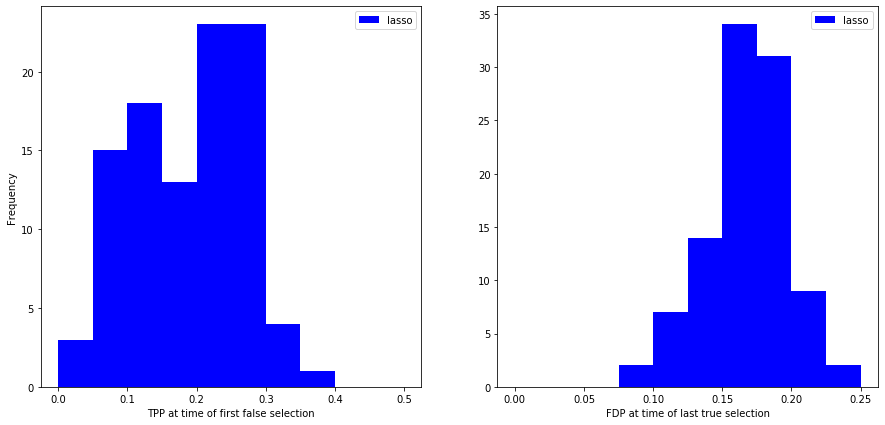

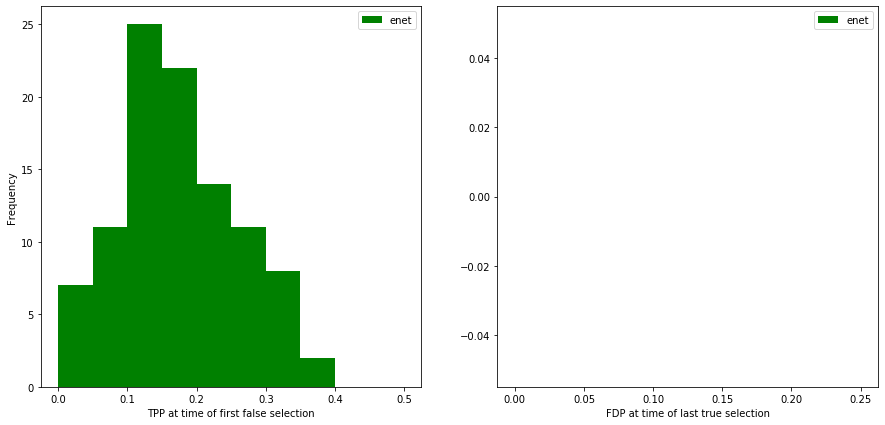

In [0]:
plot_first_last(n=1000, p=1000, k=200, color='b', algo='lasso')
plot_first_last(n=1000, p=1000, k=200, color='g', algo='enet')

### Multiple simulations compared with the curve

In [0]:
all_tpps = []
all_fdps = []
n1 = 1000
n_simulations = 10
for i in range(n_simulations):
    print("n=p="+str(n1)+" : Simulation "+str(i), end="\r")
    tpps, fdps, _ = tpp_fdp_simulation(n1, n1, eps=0.2,  noise=0, n_alphas=100, eps_algo=1e-3)
    all_tpps.append(tpps)
    all_fdps.append(fdps)

In [0]:
all_tpps_2 = []
all_fdps_2 = []
n2 = 5000
for i in range(n_simulations):
    print("n=p="+str(n2)+" : Simulation "+str(i), end="\r")
    tpps, fdps, _ = tpp_fdp_simulation(n2, n2, eps=0.2,  noise=0, n_alphas=100, eps_algo=1e-3)
    all_tpps_2.append(tpps)
    all_fdps_2.append(fdps)

In [0]:
tpp_lin = np.linspace(0,1,100)
bound_curve = [fdrlasso(elt, delta=1, epsi=0.2) for elt in tpp_lin]

Text(0.5, 1.0, 'Paires réalisées (TPP, FDP) avec la courbe limite')

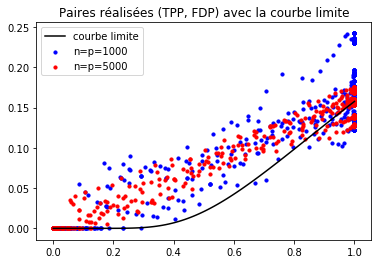

In [0]:
plt.plot(tpp_lin, bound_curve , c='k', label='courbe limite')
plt.scatter(all_tpps, all_fdps, s=10, c= 'b', label='n=p='+str(n1))
plt.scatter(all_tpps_2, all_fdps_2, s=10, c= 'r', label='n=p='+str(n2))
plt.legend()
plt.title('Paires réalisées (TPP, FDP) avec la courbe limite')

## Sharpness of the curve

### Varying $\varepsilon'$

In [0]:
n_alphas=100
tpp_fdp_dict = {}
n_simulations = 10
for eps_prime in [0.3, 0.5, 0.7, 0.9]:
    avg_tpps = np.zeros(n_alphas)
    avg_fdps = np.zeros(n_alphas)
    
    for i in range(n_simulations):
        print("eps_prime="+str(eps_prime)+" : Simulation "+str(i), end="\r")
        tpps, fdps, _ = tpp_fdp_simulation(1000, 1000, eps=0.2,  noise=0, n_alphas=n_alphas, M=50, eps_prime=eps_prime,M_low=0.1, eps_algo=1e-4)
        
        avg_tpps += tpps
        avg_fdps += fdps
        
    avg_tpps = avg_tpps/n_simulations
    avg_fdps = avg_fdps/n_simulations
    
    tpp_fdp_dict[eps_prime] = [avg_tpps, avg_fdps]

Text(0.5, 1.0, "Sharpness de la courbe limite pour differents valeurs de $\\varepsilon'$")

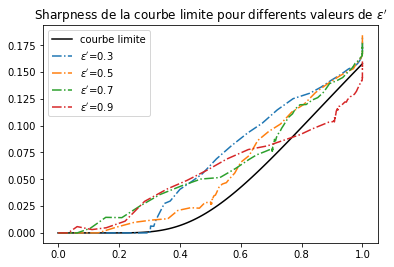

In [0]:
plt.plot(tpp_lin, bound_curve , c='k', label='courbe limite')
for eps_prime in tpp_fdp_dict:
    plt.plot(tpp_fdp_dict[eps_prime][0],tpp_fdp_dict[eps_prime][1], '-.', label=r"$\varepsilon'$="+str(eps_prime))
plt.legend()
plt.title(r"Sharpness de la courbe limite pour differents valeurs de $\varepsilon'$")

### Varying $M$

In [0]:
n_alphas=100
eps_prime = 0.5
n_simulations = 10
M_dict = {}
for M in [1, 2, 10]:
    avg_tpps = np.zeros(n_alphas)
    avg_fdps = np.zeros(n_alphas)
    for i in range(n_simulations):
        print("M="+str(M)+" : Simulation "+str(i), end="\r")
        tpps, fdps, _ = tpp_fdp_simulation(1000, 1000, eps=0.2,  noise=0, n_alphas=n_alphas, M=M, eps_prime=eps_prime,M_low=None, eps_algo=1e-4)

        avg_tpps += tpps
        avg_fdps += fdps

    avg_tpps = avg_tpps/n_simulations
    avg_fdps = avg_fdps/n_simulations

    M_dict[M] = [avg_tpps, avg_fdps]

Text(0.5, 1.0, 'Sharpness de la courbe limite pour differents valeurs de $M$')

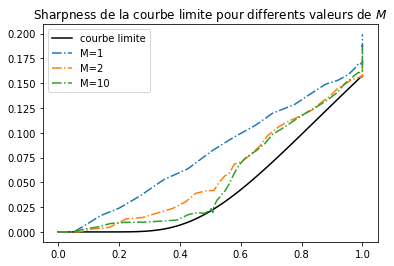

In [0]:
plt.plot(tpp_lin, bound_curve , c='k', label='courbe limite')
for M in M_dict:
    plt.plot(M_dict[M][0],M_dict[M][1], '-.', label=r"M="+str(M))
plt.legend()
plt.title(r"Sharpness de la courbe limite pour differents valeurs de $M$")

### With and without noise

In [0]:
n_alphas = 100
n_simulations = 10
noise_dict = {}
for noise in [0, 0.1]:
    avg_tpps = np.zeros(n_alphas)
    avg_fdps = np.zeros(n_alphas)
    for i in range(n_simulations):
        print("noise="+str(noise)+" : Simulation "+str(i), end="\r")
        tpps, fdps, _ = tpp_fdp_simulation(250, 1000, eps=0.02, noise=noise, M = 9.3, eps_prime=0.5, n_alphas=n_alphas, eps_algo=1e-3)

        avg_tpps += tpps
        avg_fdps += fdps

    avg_tpps = avg_tpps/n_simulations
    avg_fdps = avg_fdps/n_simulations

    noise_dict[noise] = [avg_tpps, avg_fdps]

In [0]:
tpp_lin = np.linspace(0,1,100)
bound_curve = [fdrlasso(elt, delta=0.25, epsi=0.02) for elt in tpp_lin]

(0, 0.2)

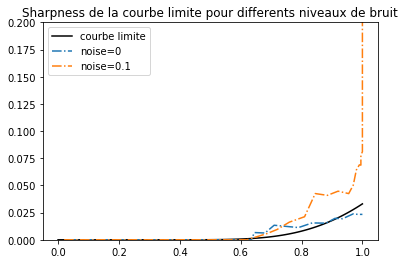

In [0]:
plt.plot(tpp_lin, bound_curve , c='k', label='courbe limite')
for noise in noise_dict:
    plt.plot(noise_dict[noise][0],noise_dict[noise][1], '-.', label=r"noise="+str(noise))
plt.legend()
plt.title(r"Sharpness de la courbe limite pour differents niveaux de bruit")
plt.ylim(0, 0.2)